# Tratamento dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime

In [4]:
base = pd.read_csv('train.csv')
base

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
# parse_dates = para converter string para datas
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [12]:
base.drop(columns = ['season', 'holiday','workingday','weather','temp','atemp', 'humidity','windspeed','casual', 'registered'], axis=1, inplace = True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [16]:
# agrupar os horários nos dias
base = base.groupby(pd.Grouper(freq='D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


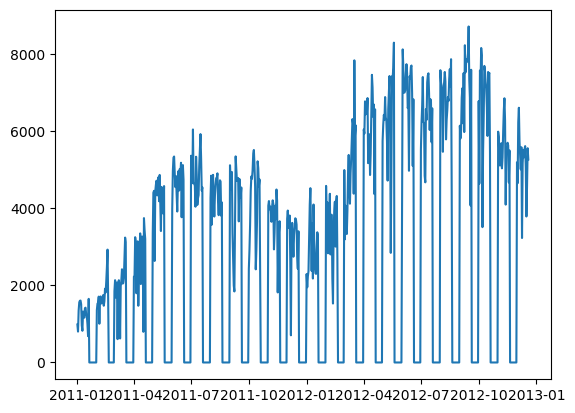

In [20]:
plt.plot(base['count'])

# Configuração do sagemaker

In [22]:
import boto3
import sagemaker
from sagemaker import RandomCutForest

In [23]:
session = sagemaker.Session()

In [24]:
bucket = 'cursoawssagemakersp'
subpasta_dataset = 'datasets/bike/random-cut'
subpasta_modelo = 'modelos/bike/random-cut' 
key = 'bike-random-cut'
s3_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, key) 
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)
role = sagemaker.get_execution_role()
boto3.Session().client('s3').head_bucket(Bucket =bucket)
 
print('Localização da base: {}'.format(s3_data)) 
print('Modelo será salvo em: {}'.format(output_location))

Localização da base: s3://cursoawssagemakersp/datasets/bike/random-cut/train/bike-random-cut
Modelo será salvo em: s3://cursoawssagemakersp/modelos/bike/random-cut/output


# Treinamento do random cut

In [42]:
random_cut = RandomCutForest(role = role,
                             instance_count = 1,
                             instance_type = 'ml.m4.xlarge',
                             data_location = s3_data,
                             output_path = output_location,
                             use_spot_instances = True,
                             max_run = 3600,
                             max_wait = 3600)

In [39]:
# para passar o count para array
base['count'].to_numpy()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [40]:
# para transformar o vetor em formatado de matriz
base['count'].to_numpy().reshape(-1,1).shape

(719, 1)

In [43]:
#record_set = para transformar os dados de pandas para o formatado requerido
random_cut.fit(random_cut.record_set(base['count'].to_numpy().reshape(-1,1)))

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: randomcutforest-2023-03-24-14-04-28-984


2023-03-24 14:04:29 Starting - Starting the training job...
2023-03-24 14:04:54 Starting - Preparing the instances for training............
2023-03-24 14:07:02 Downloading - Downloading input data...
2023-03-24 14:07:27 Training - Downloading the training image...............
2023-03-24 14:09:48 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/24/2023 14:10:08 INFO 140573240063808] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'num_samples_per_tree': 256, 'num_trees': 100, 'force_dense': 'true', 'eval_metrics': ['accuracy', 'precision_recall_fscore'], 'epochs': 1, 'mini_batch_size': 1000, '_log_level': 'info', '_kvstore': 'dist_async', '_num_kv_servers': 'auto', '_num_gpus': 'auto', '_tuning_objective_metric': '', '_ftp_port': 8999}
[03/24/2023 14:10:08 INFO 140573240063808] Merging with provided con

# Deploy

In [46]:
random_cut_bikes = random_cut.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: randomcutforest-2023-03-24-14-19-06-562
INFO:sagemaker:Creating endpoint-config with name randomcutforest-2023-03-24-14-19-06-562
INFO:sagemaker:Creating endpoint with name randomcutforest-2023-03-24-14-19-06-562


---------!

In [52]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
random_cut_bikes.serializer = CSVSerializer()
random_cut_bikes.deserializer = JSONDeserializer()

In [53]:
base_numpy = base['count'].to_numpy().reshape(-1,1)
base_numpy[0:5], base_numpy.shape

(array([[ 985],
        [ 801],
        [1349],
        [1562],
        [1600]]),
 (719, 1))

In [54]:
previsoes = random_cut_bikes.predict(base_numpy)
previsoes

{'scores': [{'score': 1.8470409302},
  {'score': 1.8856483074},
  {'score': 1.7941097953},
  {'score': 1.7612095047},
  {'score': 1.7582231154},
  {'score': 1.7573192838},
  {'score': 1.7646954815},
  {'score': 1.8516127279},
  {'score': 1.8835260674},
  {'score': 1.7986699608},
  {'score': 1.8082637826},
  {'score': 1.8230063061},
  {'score': 1.77944567},
  {'score': 1.7770600536},
  {'score': 1.8108869844},
  {'score': 1.8187012596},
  {'score': 1.8440796266},
  {'score': 1.889736027},
  {'score': 1.7699198204},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.5044238697},
  {'score': 1.7958814681},
  {'score': 1.7634142113},
  {'score': 1.7588210357},
  {'score': 1.7489691765},
  {'score': 1.8552479944},
  {'score': 1.7576819

In [55]:
previsoes = [p['score'] for p in previsoes['scores']]

In [56]:
previsoes

[1.8470409302,
 1.8856483074,
 1.7941097953,
 1.7612095047,
 1.7582231154,
 1.7573192838,
 1.7646954815,
 1.8516127279,
 1.8835260674,
 1.7986699608,
 1.8082637826,
 1.8230063061,
 1.77944567,
 1.7770600536,
 1.8108869844,
 1.8187012596,
 1.8440796266,
 1.889736027,
 1.7699198204,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.7958814681,
 1.7634142113,
 1.7588210357,
 1.7489691765,
 1.8552479944,
 1.7576819059,
 1.7488236158,
 1.7622038527,
 1.757400877,
 1.7603348775,
 1.7481609281,
 1.7727163182,
 1.7614443628,
 1.739545348,
 1.749986362,
 1.7166989382,
 1.6963449608,
 1.6704702922,
 1.7703717766,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.5044238697,
 1.7483554748,
 1.7174279224,
 1.756337399,
 1.7389582705,
 1.7200336685,
 1.8974177897,
 1.743207104,
 1.7174415608,
 1.

In [58]:
base['score'] = pd.Series(previsoes, index=base.index)
base

,count,score
datetime,,
2011-01-01,985,1.847041
2011-01-02,801,1.885648
2011-01-03,1349,1.794110
2011-01-04,1562,1.761210
2011-01-05,1600,1.758223
...,...,...
2012-12-15,5047,1.650715
2012-12-16,3786,1.590079
2012-12-17,4585,1.595028


In [60]:
base.describe()

,count,score
count,719.000000,719.000000
mean,2900.522949,1.643145
std,2659.328686,0.146445
min,0.000000,1.504424
25%,0.000000,1.504424
50%,2935.000000,1.604047
75%,5027.500000,1.738740
max,8714.000000,2.192113


In [69]:
min(previsoes), max(previsoes), 1.4 * max(previsoes)

(1.5044238697, 2.1921128179, 3.0689579450599997)

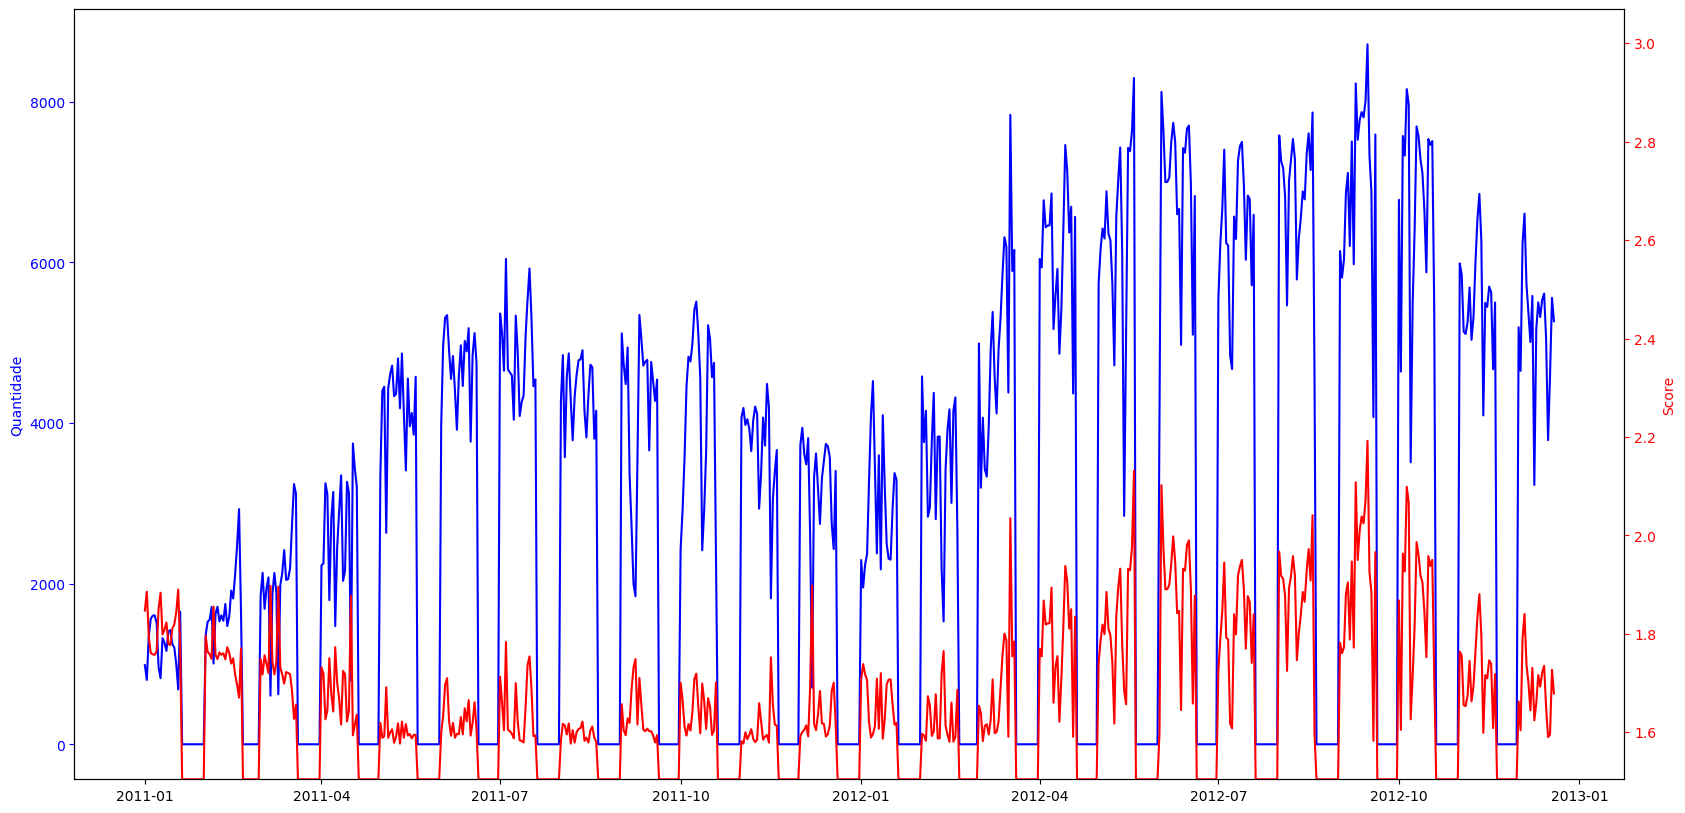

In [68]:
fig, ax1 = plt.subplots(figsize=(20,10))
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html
ax2 = ax1.twinx()

ax1.plot(base['count'], color = 'b')
ax2.plot(base['score'], color = 'r')

ax1.set_ylabel('Quantidade', color = 'b')
ax2.set_ylabel('Score', color = 'r')

ax1.tick_params('y', colors = 'b')
ax2.tick_params('y', colors = 'r')

ax2.set_ylim(min(previsoes), 1.4 * max(previsoes));

In [70]:
media_score = base['score'].mean()
media_score

1.6431447940748265

In [71]:
desvio_padrao_score = base['score'].std()
desvio_padrao_score

0.14644462242303247

In [72]:
corte_score = media_score + 3 * desvio_padrao_score
corte_score

2.0824786613439237

In [73]:
outliers = base[base['score'] > corte_score]
outliers

,count,score
datetime,,
2012-05-19,8294,2.131444
2012-06-02,8120,2.102107
2012-09-09,8227,2.107766
2012-09-15,8714,2.192113
2012-10-05,8156,2.098575


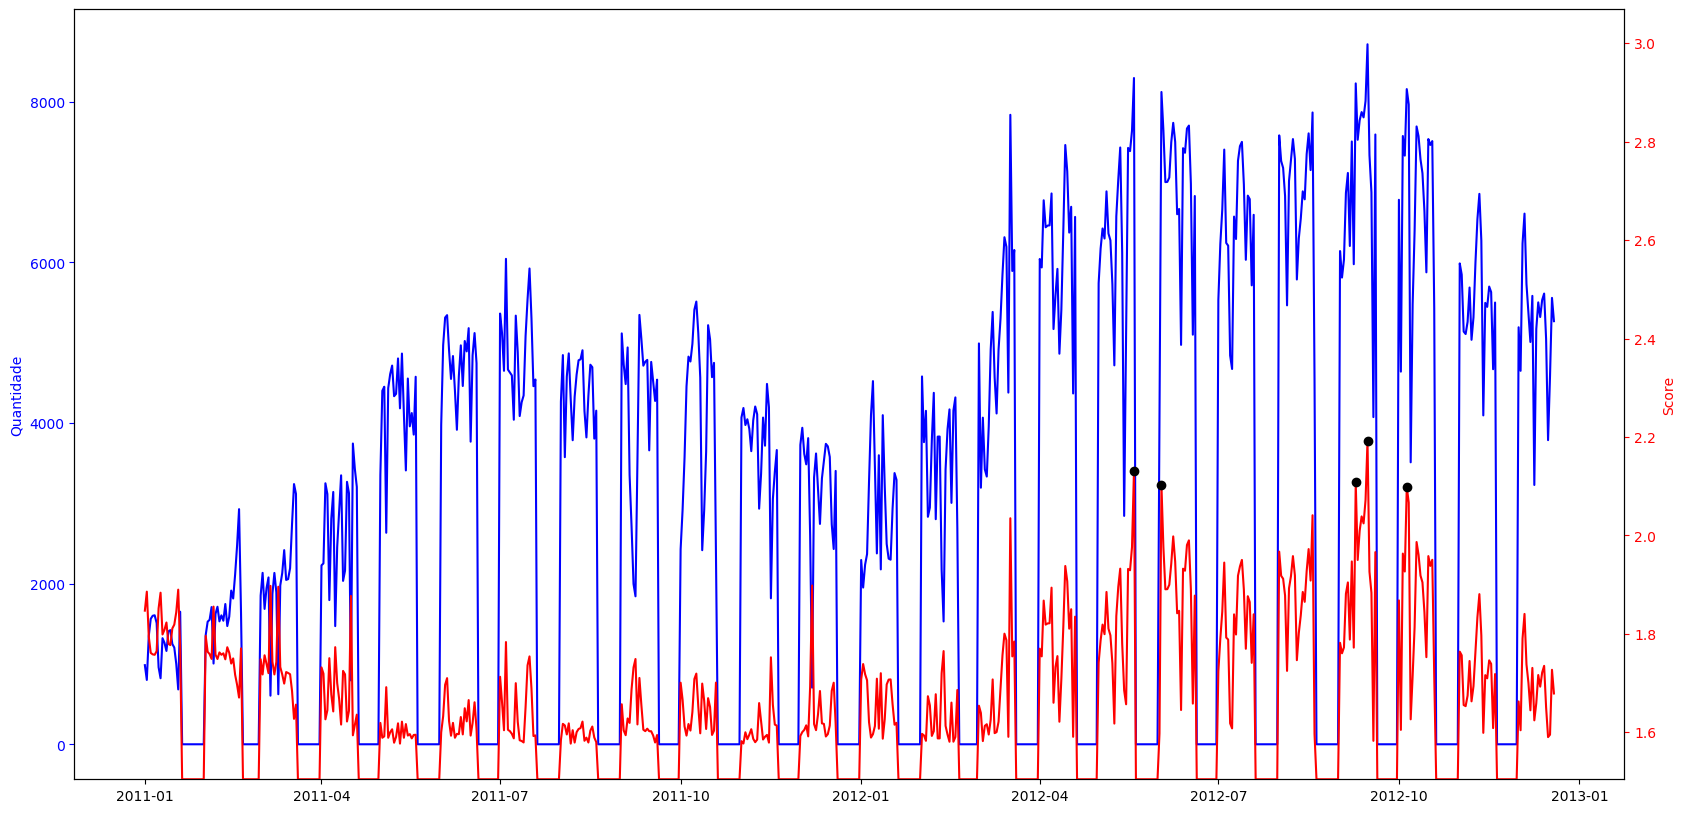

In [74]:
ax2.plot(outliers.index, outliers['score'], 'ko')
fig

In [75]:
random_cut_bikes.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: randomcutforest-2023-03-24-14-19-06-562
INFO:sagemaker:Deleting endpoint with name: randomcutforest-2023-03-24-14-19-06-562
